<a href="https://colab.research.google.com/github/QuratulAin20/Machine-Learning/blob/main/Ridge_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn.datasets import load_diabetes

data =load_diabetes()

In [3]:
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['target'] = data['target']

In [ ]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [6]:
X = df.iloc[:,: -1]
X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [7]:
y  = df.iloc[:,-1]

In [ ]:
y

,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


In [8]:
X_train , X_test , y_train,y_test = train_test_split(X,y , test_size=0.2, random_state=42)

In [ ]:
lr = LinearRegression()


In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
Y = pd.DataFrame(y_pred , y_test)
Y

,0
target,
219.0,139.547558
70.0,179.517208
202.0,134.038756
230.0,291.417029
111.0,123.789659
...,...
153.0,115.011800
98.0,78.955842
37.0,81.560873


In [ ]:
print ('The r2 score is:', r2_score(y_test,y_pred))

The r2 score is: 0.4526027629719195


In [ ]:
print('The coefficients are: ' ,lr.coef_)
print('The intercept is: ' ,lr.intercept_)

The coefficients are:  [  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]
The intercept is:  151.34560453985995


In [ ]:
R =Ridge(alpha= 0.03)
R.fit(X_train,y_train)


Ridge(alpha=0.03)

In [ ]:
y1 = R.predict(X_test)

In [ ]:
print("The r2-score is : ",r2_score(y_test,y1))

The r2-score is :  0.45778208891361505


In [ ]:
print('The coefficients are: ' ,R.coef_)
print('The intercept is: ' ,R.intercept_)

The coefficients are:  [  41.82477874 -229.09573507  538.56299112  335.13973787 -229.72870066
  -18.02653442 -147.64530919  173.34249818  458.30774396   62.84051437]
The intercept is:  151.3587462376124


# Apply SGDREGRESSOR

In [4]:
reg = SGDRegressor(penalty='l2',max_iter=500,eta0=0.1,learning_rate='constant',alpha=0.001)

In [ ]:
reg.fit(X_train,y_train)

SGDRegressor(alpha=0.001, eta0=0.1, learning_rate='constant', max_iter=500)

In [ ]:
y2 = reg.predict(X_test)

In [ ]:
print("The r2-score is : ",r2_score(y_test,y2))

The r2-score is :  0.45249523758661137


In [ ]:
print('The coefficients are: ' ,reg.coef_)
print('The intercept is: ' ,reg.intercept_)

The coefficients are:  [  43.50883657 -141.44376666  401.23796297  265.58591827  -34.79593576
  -72.69037905 -186.28940593  135.96100168  307.63157112  112.37983329]
The intercept is:  [149.29597213]


# Building our own ridge regression class

In [ ]:
class RidgeRegression:

  def __init__(self,alpha=0.03):

    self.alpha=alpha
    self.coef_ = None
    self.intercept_ = None

  def fit(self,X_train,y_train):
    X_train = np.insert(X_train , 0 ,1 ,axis=1)
    I = np.identity(X_train.shape[1])
    I[0][0] = 0
    result = np.linalg.inv(np.dot(X_train.T,X_train) + self.alpha * I).dot(X_train.T).dot(y_train)
    self.intercept_ = result[0]
    self.coef_ = result[1:]

  def predict(self,X_test):
    return np.dot(X_test,self.coef_) + self.intercept_

In [ ]:
RR = RidgeRegression()

In [ ]:
RR.fit(X_train,y_train)

In [ ]:
y3 = RR.predict(X_test)

In [ ]:
print("The r2-score is : ",r2_score(y_test,y3))

The r2-score is :  0.4577820889136148


In [ ]:
print('The coefficients are: ' ,RR.coef_)
print('The intercepts is: ' ,RR.intercept_)

The coefficients are:  [  41.82477874 -229.09573507  538.56299112  335.13973787 -229.72870066
  -18.02653442 -147.64530919  173.34249818  458.30774396   62.84051437]
The intercepts is:  151.3587462376124


# Building Gradient Descent Regressor

In [ ]:
class RigdeGD:

  def __init__(self,alpha,epochs,learning_rate):
    self.alpha = alpha
    self.epochs=epochs
    self.learning_rate = learning_rate
    self.coef_ = None
    self.intercept_ = None

  def fit (self,X_train,y_train):
     self.coef_ = np.ones(X_train.shape[1])
     self.intercept_ = 0
     thetha = np.insert(self.coef_,0,self.intercept_)

     X_train = np.insert(X_train,0,1,axis=1)

     for i in range(self.epochs):
         thetha_der = np.dot(X_train.T,X_train).dot(thetha) - np.dot(X_train.T,y_train) + self.alpha*thetha
         thetha = thetha - self.learning_rate*thetha_der

     self.coef_ = thetha[1:]
     self.intercept_ = thetha[0]

  def predict(self,X_test):
     return np.dot(X_test,self.coef_) + self.intercept_


In [ ]:
Reg = RigdeGD(epochs=500,alpha=0.001,learning_rate=0.005)

In [ ]:
Reg.fit(X_train,y_train)
y4 =  Reg.predict(X_test)

In [ ]:
print("The r2-score is : ",r2_score(y_test,y4))

The r2-score is :  0.4592249376936409


In [ ]:
print('The coefficients are: ' ,Reg.coef_)
print('The intercepts is: ' ,Reg.intercept_)

The coefficients are:  [  43.37183861 -192.03766574  496.43542567  319.37407     -64.42788084
 -113.194338   -213.9073644   144.86136322  367.67948022  119.56857869]
The intercepts is:  151.4045475591972


# 5 key point for Ridge Regression

1- How coefficient get effected by ridge regression (mean what if we increase the alpha value)

A. The coefficient get shrink mean they will move toward the 0 because when alpha is 0 then it will be a linear regression and no regularization will happen.

In [9]:
coefs = []
r2_scores = []

for i in [0,10,100,1000]:
    reg = Ridge(alpha=i)
    reg.fit(X_train,y_train)

    coefs.append(reg.coef_.tolist())
    y_pred = reg.predict(X_test)
    r2_scores.append(r2_score(y_test,y_pred))

In [12]:
feature_names = df.columns.tolist()

print(feature_names)


['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'target']


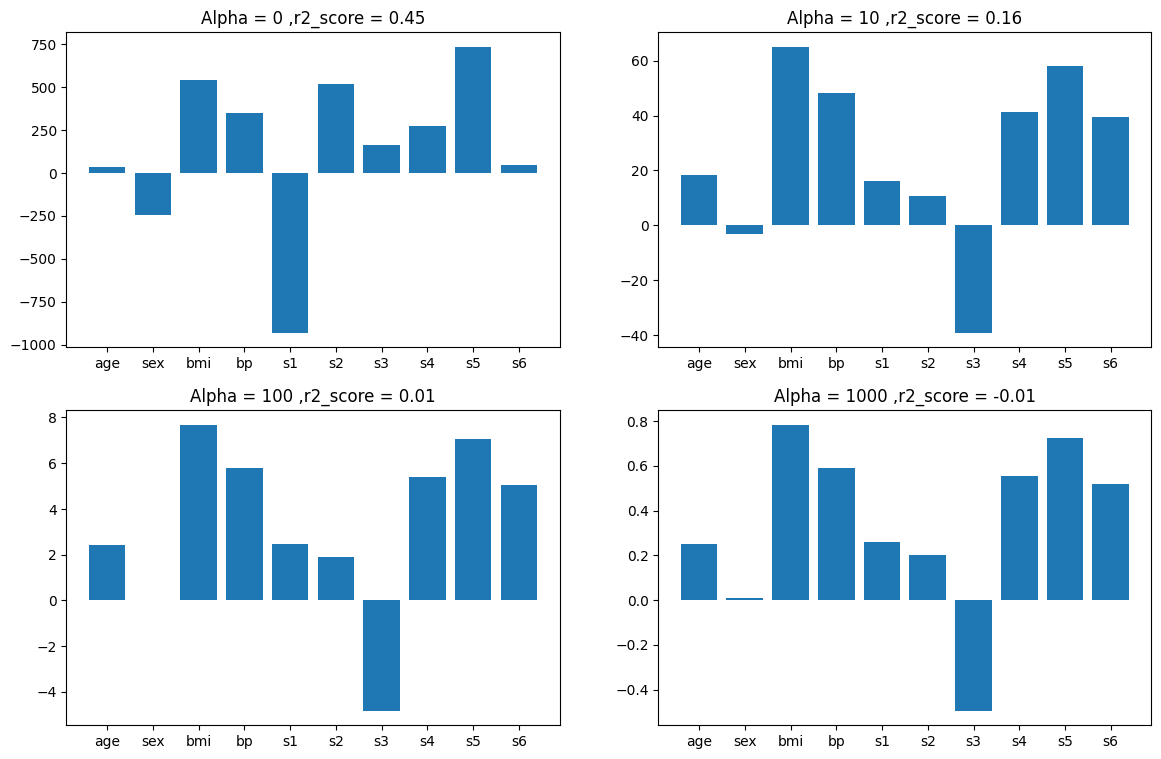

In [13]:
plt.figure(figsize=(14,9))
plt.subplot(221)
plt.bar(data.feature_names,coefs[0])
plt.title('Alpha = 0 ,r2_score = {}'.format(round(r2_scores[0],2)))

plt.subplot(222)
plt.bar(data.feature_names,coefs[1])
plt.title('Alpha = 10 ,r2_score = {}'.format(round(r2_scores[1],2)))

plt.subplot(223)
plt.bar(data.feature_names,coefs[2])
plt.title('Alpha = 100 ,r2_score = {}'.format(round(r2_scores[2],2)))

plt.subplot(224)
plt.bar(data.feature_names,coefs[3])
plt.title('Alpha = 1000 ,r2_score = {}'.format(round(r2_scores[3],2)))

plt.show()

2. By increasing lambda what is the effect on higher coefficient values?

A. The rate of convergence towards 0 is more for the higher coefficient as compare to the lower value coefficient.


In [14]:
alphas = [0,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

coefs = []

for i in alphas:
    reg = Ridge(alpha=i)
    reg.fit(X_train,y_train)

    coefs.append(reg.coef_.tolist())

In [34]:
input_array = np.array(coefs)

In [31]:
feature_names = df.columns.tolist()

In [35]:
coef_df = pd.DataFrame(input_array,columns=data.feature_names)
coef_df['alpha'] = alphas
coef_df.set_index('alpha')

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
alpha,,,,,,,,,,
0.0000,37.904021,-241.964362,542.428759,347.703844,-931.488846,518.062277,163.419983,275.317902,736.198859,48.670657
0.0001,37.968967,-241.900460,542.593504,347.604088,-919.863924,508.995920,158.213776,273.689919,731.714305,48.786920
0.0010,38.483505,-241.351795,543.835179,346.782831,-827.701995,437.173749,116.949753,260.759264,696.129223,49.743447
0.0100,40.693422,-237.008020,546.161792,341.809317,-430.146300,129.902301,-60.460817,203.990842,541.098025,55.482553
0.1000,42.855670,-205.494319,505.089033,317.093205,-108.500262,-86.236733,-190.363180,151.707086,392.289319,79.908177
1.0000,45.367377,-76.666086,291.338832,198.995817,-0.530310,-28.577050,-144.511905,119.260066,230.221608,112.149830
10.0000,18.229623,-3.277536,65.128417,48.219668,16.238315,10.861055,-39.208913,41.438568,57.950124,39.359401
100.0000,2.414573,0.036315,7.689592,5.786517,2.488549,1.902019,-4.832511,5.397252,7.072654,5.030673
1000.0000,0.249289,0.008728,0.783880,0.590946,0.260657,0.201464,-0.495031,0.556314,0.723795,0.517311


- Coefficient of sex highly converge towards 0 as compare to age

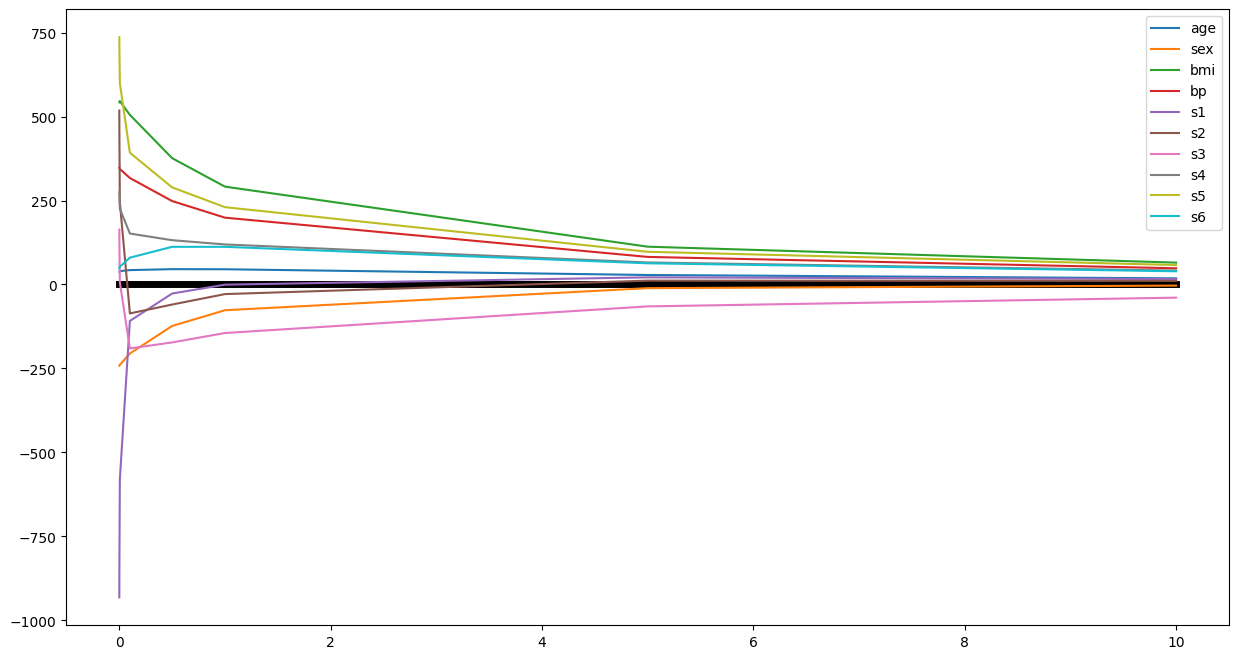

In [36]:
alphas = [0,0.0001,0.0005,0.001,0.005,0.1,0.5,1,5,10]

coefs = []

for i in alphas:
    reg = Ridge(alpha=i)
    reg.fit(X_train,y_train)

    coefs.append(reg.coef_.tolist())


input_array = np.array(coefs).T

plt.figure(figsize=(15,8))
plt.plot(alphas,np.zeros(len(alphas)),color='black',linewidth=5)
for i in range(input_array.shape[0]):
    plt.plot(alphas,input_array[i],label=data.feature_names[i])
plt.legend()

3. What is the effect of regularization on bias-variance tradeoff?

A. Ridge regression perform regularization and regularization is one of the technique of bias-variance tradeoff. If we consider the value of lambda near to zero then there is low bias and high variance due to overfitting whereas, as we increase the value of lambda the biasness increases and variance decreases hence too high lambda value result in  
underfitting. The value of lambda has low bias and low variance.

- The key idea is that by minimizing the total error (the sum of bias and variance).
-Plot the bias and variance values against the different alpha values to visualize the trade-off between the two. If the bias and variance curves do not intersect, find the alpha value that minimizes the sum of the bias and variance. This is the point where the total error is minimized.

In [38]:
X_train1 = X_train.values
X_test1 = X_test.values
y_train1 = y_train.values
y_test1 = y_test.values


In [39]:
from mlxtend.evaluate import bias_variance_decomp

alphas = np.linspace(0,30,100)

loss = []
bias = []
variance = []

for i in alphas:
    reg = Ridge(alpha=i)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        reg, X_train1, y_train1, X_test1, y_test1,
        loss='mse',
        random_seed=123)
    loss.append(avg_expected_loss)
    bias.append(avg_bias)
    variance.append(avg_var)

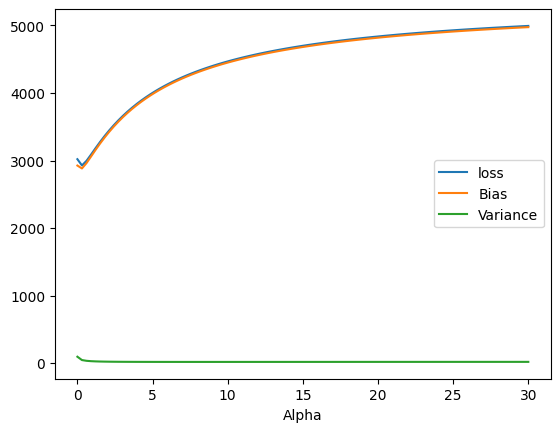

In [50]:
plt.plot(alphas,loss,label='loss')
plt.plot(alphas,bias,label='Bias')
plt.plot(alphas,variance,label='Variance')
plt.xlabel('Alpha')
plt.legend()
plt.show()


4. What is the affect of lambda on loss function?
